In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10 ))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

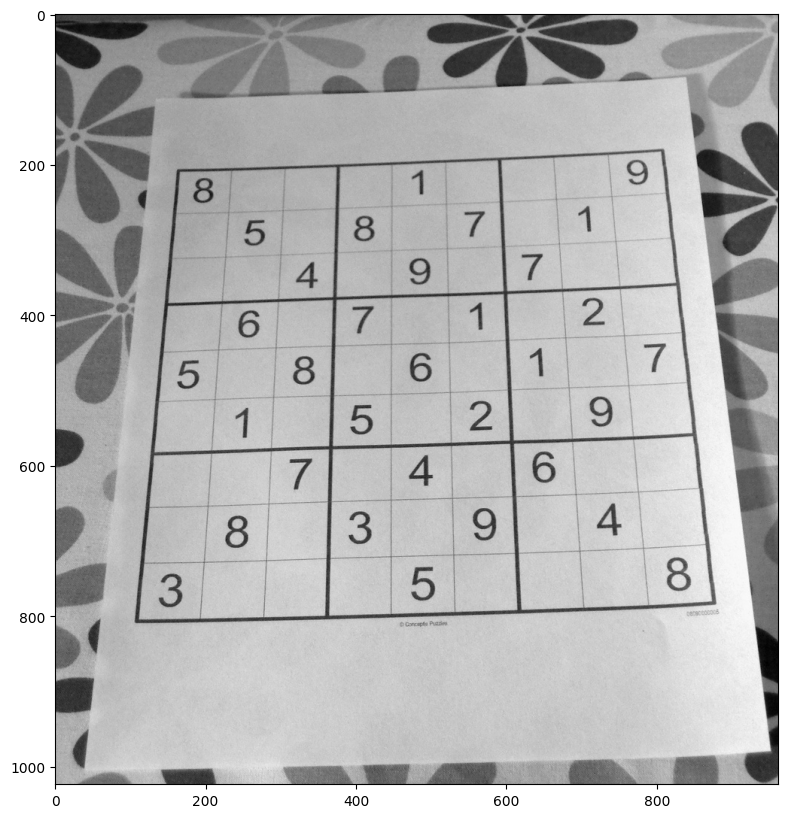

In [4]:
img = cv2.imread("../DATA/sudoku.jpg",0) #this 0 make it red and gray scale
display_img(img)

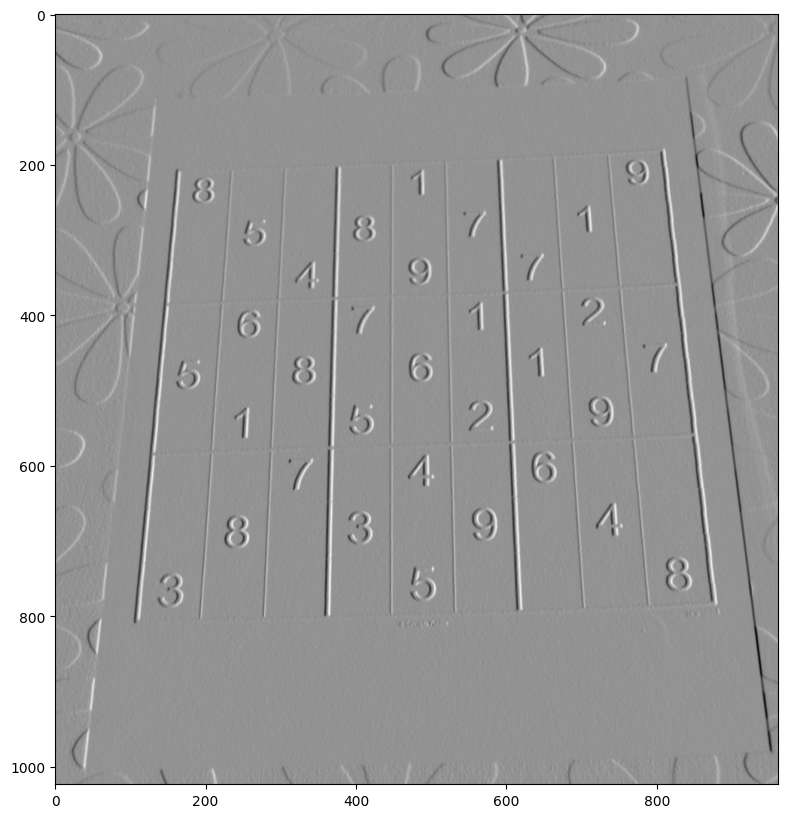

In [5]:
sobelX = cv2.Sobel(img,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)
#ddepth：图像的深度,输出图像的深度。cv2.CV_64F表示64位浮点数。如果选择的深度较低,可能会由于数据溢出而丢失或者损坏边缘信息。通常,我们选择更高的深度（例如CV_64F）,然后再将其缩放到8位。
#dx：x方向的导数的阶数。
#dy：y方向的导数的阶数。
'''dx和dy: 这些参数定义了我们在哪个方向上寻找边缘。如果dx=1和dy=0,Sobel滤波器将在水平方向上查找边缘。如果dx=0和dy=1,Sobel滤波器将在垂直方向上查找边缘。
如果两者都为1,那么它将同时在两个方向上查找边缘,但这通常会使结果更敏感于噪声。'''
display_img(sobelX)
#定义了dx=1, dy=0这表示在水平方向查找边缘，所以水平的边缘会被淡化

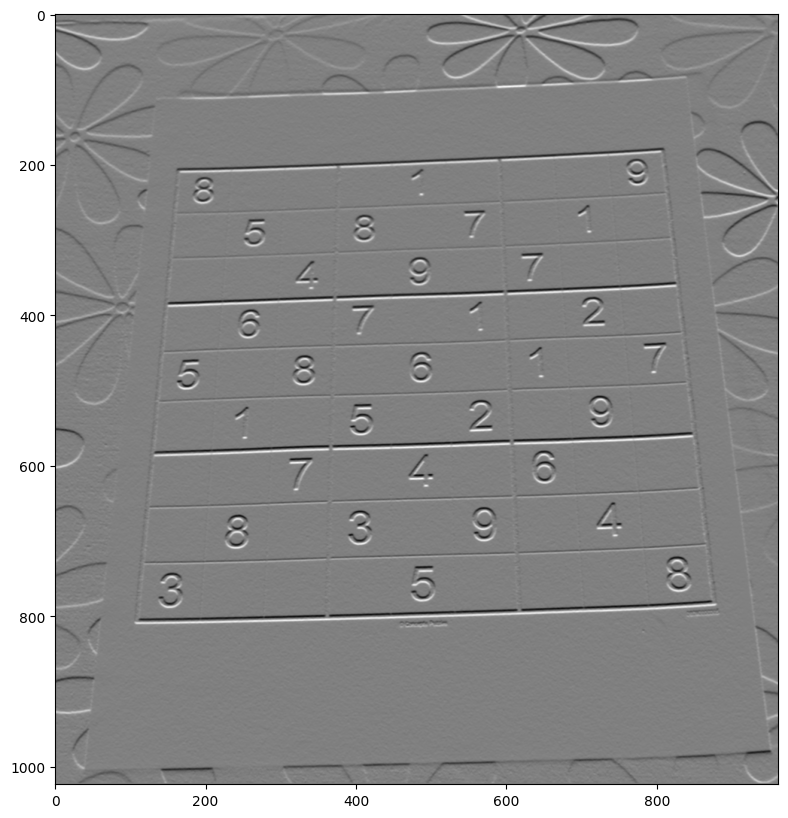

In [6]:
sobelY = cv2.Sobel(img,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5)
display_img(sobelY)
#定义了dx=0, dy=1这表示垂直方向查找边缘，所以垂直的边缘会被淡化

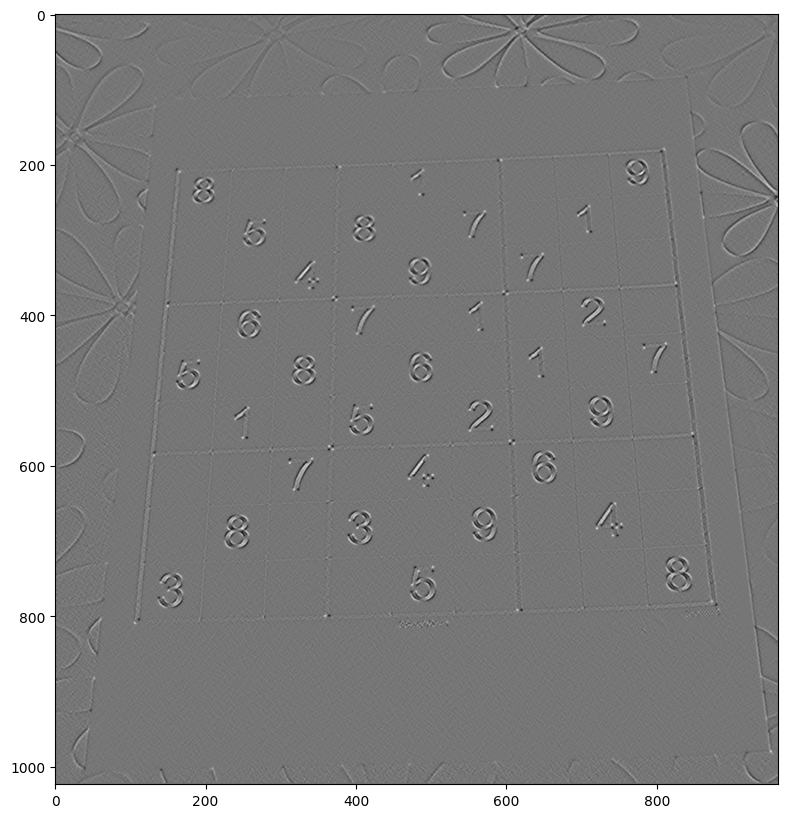

In [7]:
sobelXY = cv2.Sobel(img,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=5)
display_img(sobelXY)
#如果dx, dy都被用于查找边缘，那么噪点会很明显

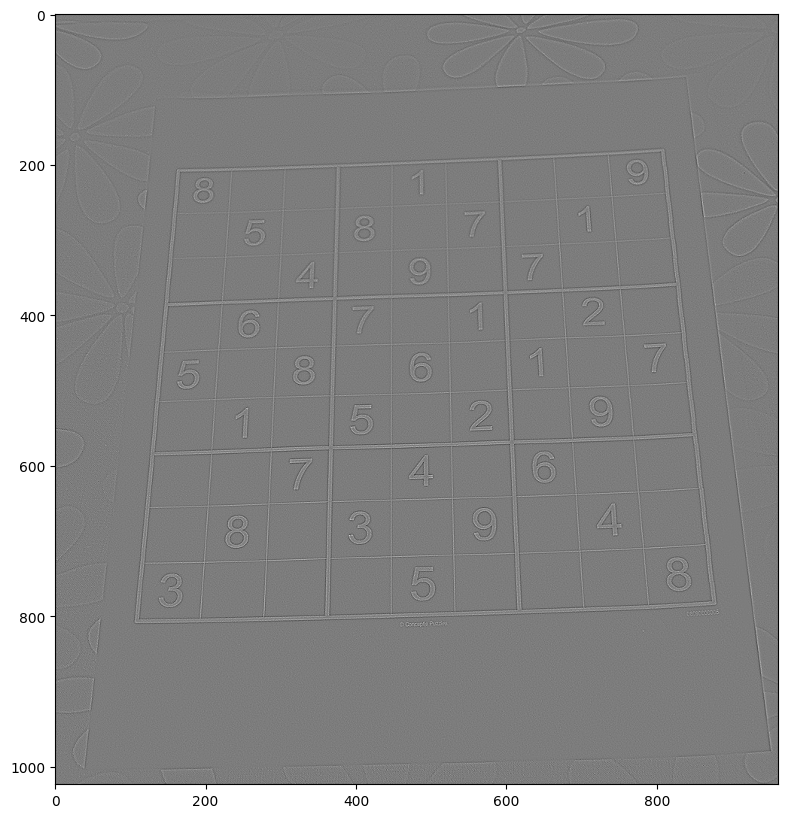

In [8]:
laplacian = cv2.Laplacian(img,ddepth=cv2.CV_64F)
display_img(laplacian)
#for both horizontal and vertical edge detection
#the Laplacian operator may increase the noise in the image because it emphasizes all rapid changes, including those caused by noise.

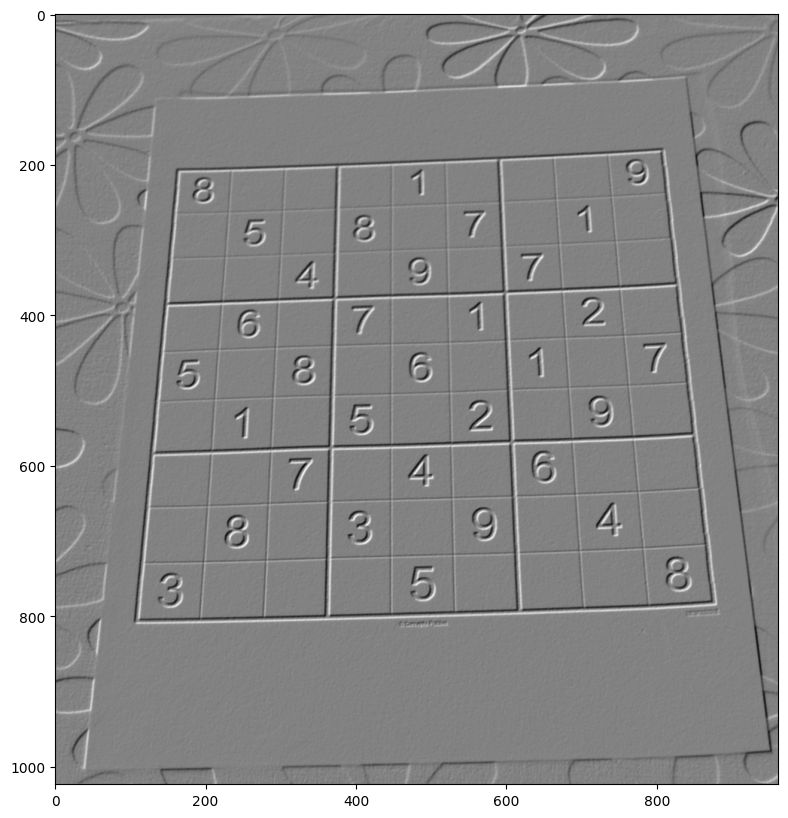

In [9]:
blended = cv2.addWeighted(src1= sobelX,alpha=0.5,src2=sobelY,beta=0.5,gamma=0)
display_img(blended)

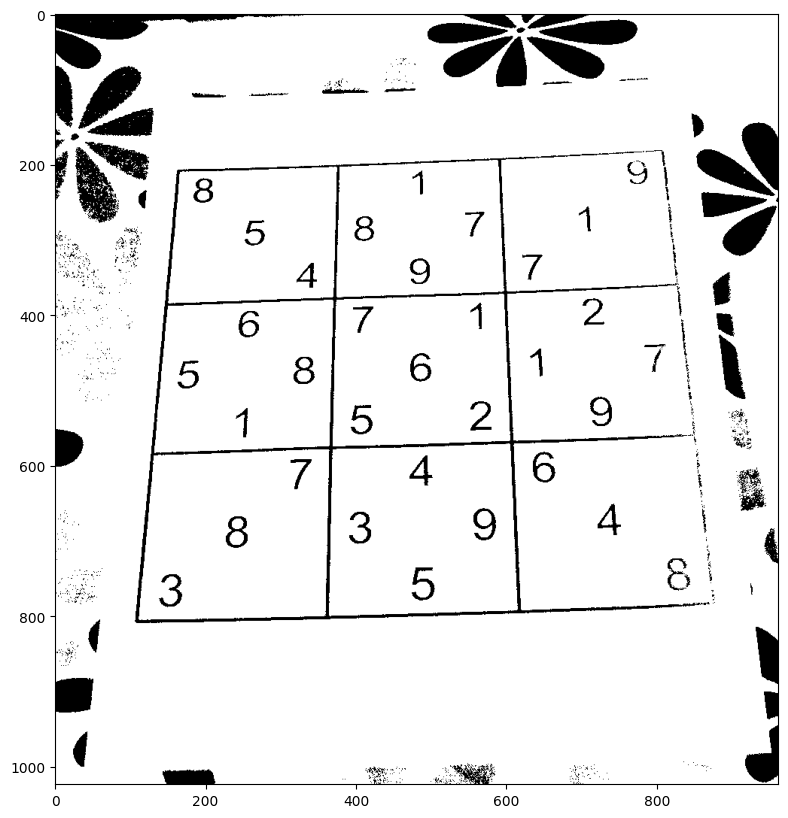

In [11]:
ret, th1 = cv2.threshold(img,thresh=100,maxval=255,type=cv2.THRESH_BINARY)
# cv2.threshold() 是一个在图像处理中常用的阈值化函数。阈值化是一种将灰度图像转换为二值图像的最常用方法。在这种转换中，我们根据阈值将像素值转换为0（黑色）或255（白色）。
# thresh=100：这是阈值。在这种情况下，任何像素值低于100的都会被设置为0，任何像素值高于（或等于）100的都会被设置为第三个参数定义的最大值。
# maxval=255：这是当像素值超过（或等于）阈值时赋予的最大值。
# cv2.THRESH_BINARY：这是阈值类型。THRESH_BINARY是最简单的阈值类型，它将所有高于阈值的像素值设置为最大值（255），所有低于阈值的像素值设置为0。
display_img(th1)

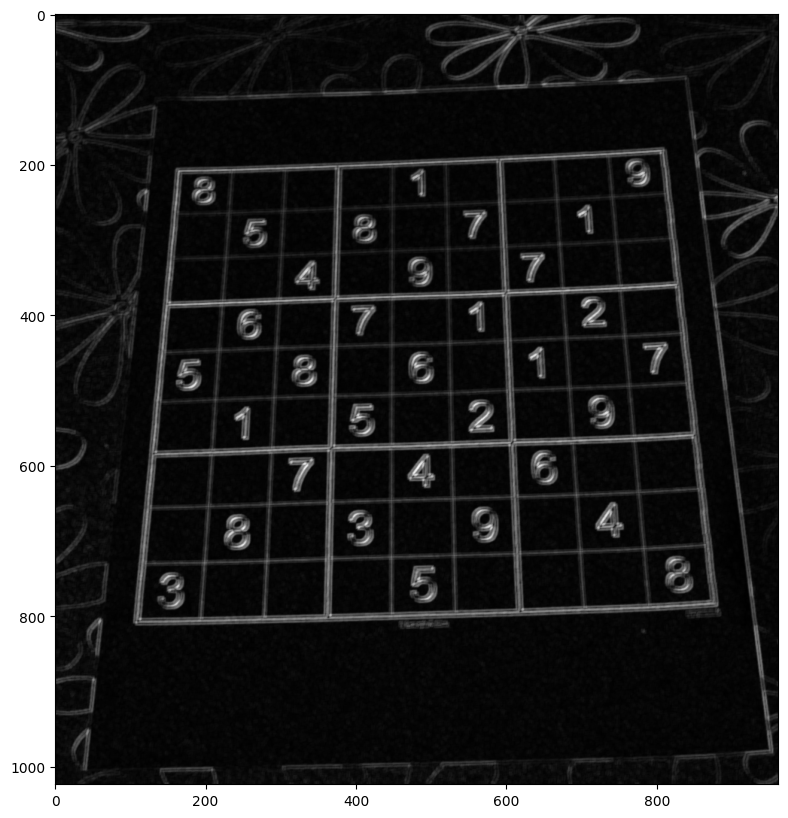

In [13]:
kernel = np.ones((4,4),dtype=np.uint8)
gradient = cv2.morphologyEx(src=blended,op=cv2.MORPH_GRADIENT,kernel=kernel)
display_img(gradient)